In [10]:
from pycaret.datasets import get_data
import joblib as jb
import pandas as pd
from sklearn.model_selection import train_test_split

In [11]:
df = pd.DataFrame(jb.load('03_FE.bin'))

In [12]:
df = df.dropna()
df.shape

(56935, 48)

In [13]:
data, data_unseen = train_test_split(df, test_size=0.05, stratify=df['hospital_death'], random_state=42)

In [14]:
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (54088, 48)
Unseen Data For Predictions: (2847, 48)


_______________________________

In [15]:
from pycaret.classification import *

In [16]:
exp_clf101 = setup(data = data, target = 'hospital_death')

,Description,Value
0,Session id,7619
1,Target,hospital_death
2,Target type,Binary
3,Original data shape,"(54088, 48)"
4,Transformed data shape,"(54088, 85)"
5,Transformed train set shape,"(37861, 85)"
6,Transformed test set shape,"(16227, 85)"
7,Numeric features,26
8,Categorical features,7
9,Preprocess,True


In [17]:
var_optimizar = 'F1'

In [18]:
best_model = compare_models(sort=var_optimizar)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9184,0.8612,0.3718,0.5361,0.4387,0.3963,0.4042,0.1950
gbc,Gradient Boosting Classifier,0.9257,0.8740,0.2780,0.6604,0.3909,0.3583,0.3969,1.0460
xgboost,Extreme Gradient Boosting,0.9223,0.0000,0.2894,0.6008,0.3898,0.3538,0.3812,1.0280
lightgbm,Light Gradient Boosting Machine,0.9246,0.0000,0.2749,0.6446,0.3851,0.3518,0.3886,0.5900
ada,Ada Boost Classifier,0.9231,0.8687,0.2746,0.6170,0.3797,0.3452,0.3777,0.4370
nb,Naive Bayes,0.7969,0.0000,0.6734,0.2485,0.3630,0.2716,0.3196,0.3350
rf,Random Forest Classifier,0.9255,0.0000,0.2402,0.6939,0.3563,0.3266,0.3794,0.4360
lr,Logistic Regression,0.9227,0.8599,0.2359,0.6345,0.3436,0.3116,0.3554,2.1660
et,Extra Trees Classifier,0.9250,0.0000,0.2023,0.7318,0.3163,0.2900,0.3589,0.5010
dt,Decision Tree Classifier,0.8750,0.0000,0.3250,0.2945,0.3088,0.2403,0.2408,0.2110


In [19]:
print(best_model)

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)


In [20]:
# et = create_model('et')
# et_tuned = tune_model(et, optimize=var_optimizar)
# print(f'Modelo Base Extra Trees:\n {et}')
# print(f'Modelo Entrenado Extra Trees:\n {et_tuned}')

In [21]:
# rid = create_model('ridge')
# rid_tuned = tune_model(rid, optimize=var_optimizar)
# print(f'Modelo Base Ridge:\n {rid}')
# print(f'Modelo Entrenado Ridge:\n {rid_tuned}')

In [22]:
lgbm = create_model('lightgbm')
lgbm_tuned = tune_model(lgbm, optimize=var_optimizar)
print(f'Modelo Base LGBM:\n {lgbm}')
print(f'Modelo Entrenado LGBM:\n {lgbm_tuned}')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9226,0.0000,0.2791,0.6107,0.3832,0.3479,0.3785
1,0.9276,0.0000,0.3046,0.6735,0.4195,0.3867,0.4216
2,0.9234,0.0000,0.2769,0.6207,0.3830,0.3485,0.3810
3,0.9229,0.0000,0.2585,0.6222,0.3652,0.3315,0.3682
4,0.9208,0.0000,0.2646,0.5850,0.3644,0.3285,0.3582
5,0.9266,0.0000,0.2769,0.6767,0.3930,0.3612,0.4025
6,0.9258,0.0000,0.2554,0.6803,0.3714,0.3405,0.3872
7,0.9216,0.0000,0.2615,0.5986,0.3640,0.3290,0.3613
8,0.9279,0.0000,0.2831,0.6970,0.4026,0.3715,0.4146


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9250,0.0000,0.3282,0.6221,0.4297,0.3937,0.4168
1,0.9253,0.0000,0.3323,0.6207,0.4329,0.3968,0.4191
2,0.9216,0.0000,0.3046,0.5824,0.4000,0.3624,0.3843
3,0.9208,0.0000,0.2615,0.5862,0.3617,0.3260,0.3564
4,0.9165,0.0000,0.2523,0.5290,0.3417,0.3030,0.3269
5,0.9226,0.0000,0.2862,0.6039,0.3883,0.3526,0.3808
6,0.9258,0.0000,0.2738,0.6642,0.3878,0.3555,0.3955
7,0.9223,0.0000,0.2708,0.6069,0.3745,0.3395,0.3712
8,0.9276,0.0000,0.2892,0.6861,0.4069,0.3751,0.4152


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Modelo Base LGBM:
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=7619, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)
Modelo Entrenado LGBM:
 LGBMClassifier(bagging_fraction=0.7, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.3, max_depth=-1,
               min_child_samples=61, min_child_weight=0.001, min_split_gain=0.5,
               n_estimators=100, n_jobs=-1, num_leaves=20, objective=None,
               random_state=7619, reg_alpha=2, reg_lambda=10, subs

In [23]:
# rf = create_model('rf')
# rf_tuned = tune_model(rf, optimize=var_optimizar)
# print(f'Modelo Base Random Forest:\n {rf}')
# print(f'Modelo Entrenado Random Forest:\n {rf_tuned}')

In [24]:
# qda = create_model('qda')
# qda_tuned = tune_model(qda, optimize=var_optimizar)
# print(f'Modelo Base QDA:\n {qda}')
# print(f'Modelo Entrenado QDA:\n {qda_tuned}')

In [25]:
# nb = create_model('nb')
# nb_tuned = tune_model(nb, optimize=var_optimizar)
# print(f'Modelo Base Naive Bayes:\n {nb}')
# print(f'Modelo Entrenado Naive Bayes:\n {nb_tuned}')

In [26]:
lda = create_model('lda')
lda_tuned = tune_model(lda, optimize=var_optimizar)
print(f'Modelo Base LDA:\n {lda}')
print(f'Modelo Entrenado LDA:\n {lda_tuned}')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9163,0.8615,0.3681,0.5195,0.4309,0.3871,0.3938
1,0.9239,0.8821,0.4185,0.5787,0.4857,0.4458,0.4526
2,0.9176,0.8664,0.4031,0.5261,0.4564,0.4127,0.4170
3,0.9157,0.8694,0.3508,0.5135,0.4168,0.3731,0.3810
4,0.9165,0.8481,0.3723,0.5193,0.4337,0.3900,0.3963
5,0.9160,0.8593,0.3785,0.5146,0.4362,0.3919,0.3973
6,0.9208,0.8597,0.3662,0.5587,0.4424,0.4017,0.4121
7,0.9165,0.8542,0.3385,0.5213,0.4104,0.3677,0.3777
8,0.9189,0.8549,0.3600,0.5417,0.4325,0.3908,0.4002


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9158,0.8614,0.3681,0.5150,0.4293,0.3852,0.3916
1,0.9237,0.8819,0.4185,0.5763,0.4848,0.4447,0.4514
2,0.9168,0.8664,0.4000,0.5200,0.4522,0.4080,0.4121
3,0.9155,0.8693,0.3538,0.5111,0.4182,0.3742,0.3816
4,0.9163,0.8477,0.3723,0.5171,0.4329,0.3890,0.3951
5,0.9155,0.8592,0.3785,0.5104,0.4346,0.3900,0.3951
6,0.9205,0.8595,0.3662,0.5561,0.4416,0.4007,0.4109
7,0.9168,0.8541,0.3385,0.5238,0.4112,0.3687,0.3789
8,0.9189,0.8546,0.3631,0.5413,0.4346,0.3928,0.4019


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Modelo Base LDA:
 LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)
Modelo Entrenado LDA:
 LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)


In [27]:
xgb = create_model('xgboost')
xgb_tuned = tune_model(xgb, optimize=var_optimizar)
print(f'Modelo Base XGB:\n {xgb}')
print(f'Modelo Entrenado XGB:\n {xgb_tuned}')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9181,0.0000,0.2975,0.5449,0.3849,0.3451,0.3633
1,0.9271,0.0000,0.3354,0.6450,0.4413,0.4064,0.4314
2,0.9186,0.0000,0.2954,0.5486,0.3840,0.3446,0.3636
3,0.9216,0.0000,0.2492,0.6045,0.3529,0.3188,0.3546
4,0.9189,0.0000,0.2892,0.5529,0.3798,0.3409,0.3615
5,0.9268,0.0000,0.3200,0.6500,0.4289,0.3946,0.4230
6,0.9221,0.0000,0.2554,0.6103,0.3601,0.3259,0.3614
7,0.9202,0.0000,0.2677,0.5762,0.3655,0.3290,0.3567
8,0.9258,0.0000,0.2923,0.6507,0.4034,0.3699,0.4038


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9144,0.0000,0.3896,0.5040,0.4394,0.3940,0.3978
1,0.9202,0.0000,0.4369,0.5441,0.4846,0.4420,0.4451
2,0.9205,0.0000,0.4338,0.5465,0.4837,0.4413,0.4447
3,0.9173,0.0000,0.3938,0.5246,0.4499,0.4062,0.4111
4,0.9144,0.0000,0.4338,0.5018,0.4653,0.4191,0.4204
5,0.9179,0.0000,0.4400,0.5257,0.4791,0.4349,0.4369
6,0.9216,0.0000,0.4185,0.5574,0.4780,0.4365,0.4418
7,0.9197,0.0000,0.4154,0.5422,0.4704,0.4278,0.4322
8,0.9186,0.0000,0.4123,0.5339,0.4653,0.4220,0.4262


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Modelo Base XGB:
 XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)
Modelo Entrenado XGB:
 XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsam

_________________

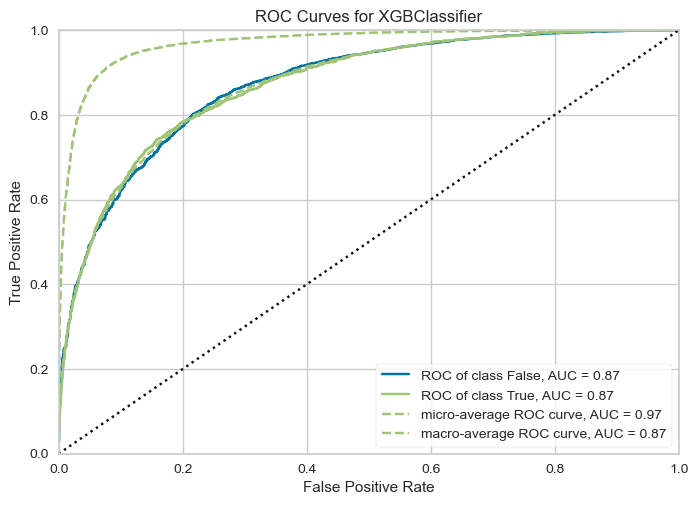

In [28]:
plot_model(xgb_tuned, plot = 'auc')

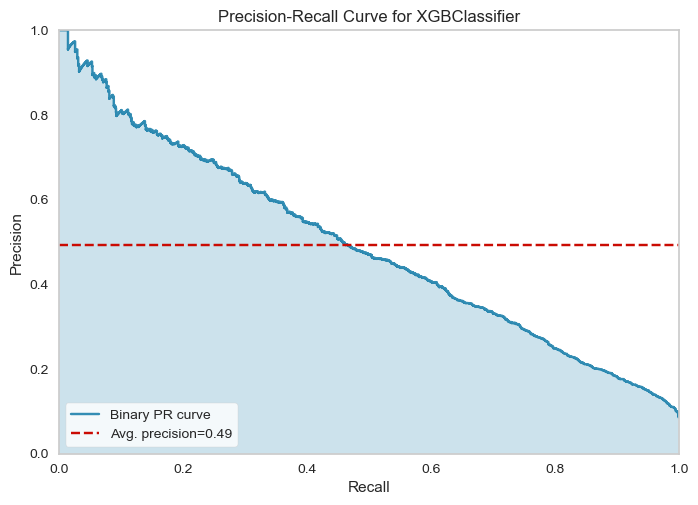

In [29]:
plot_model(xgb_tuned, plot = 'pr')

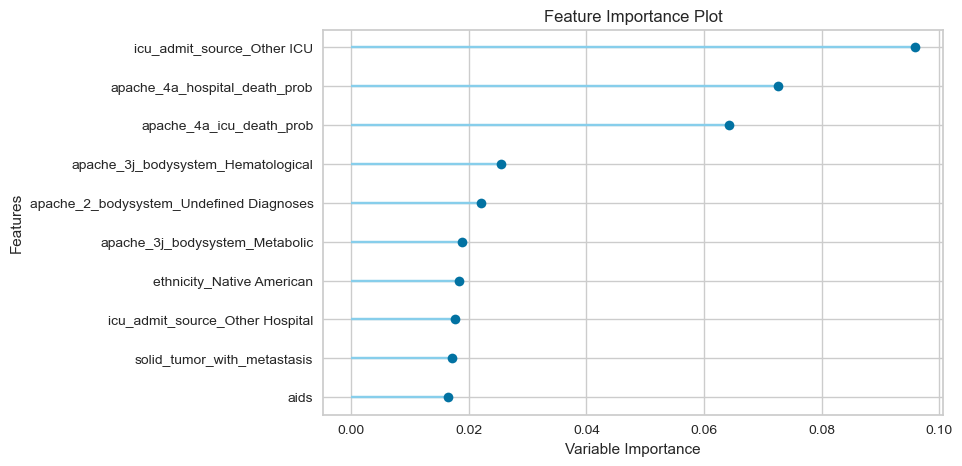

In [30]:
plot_model(xgb_tuned, plot='feature')

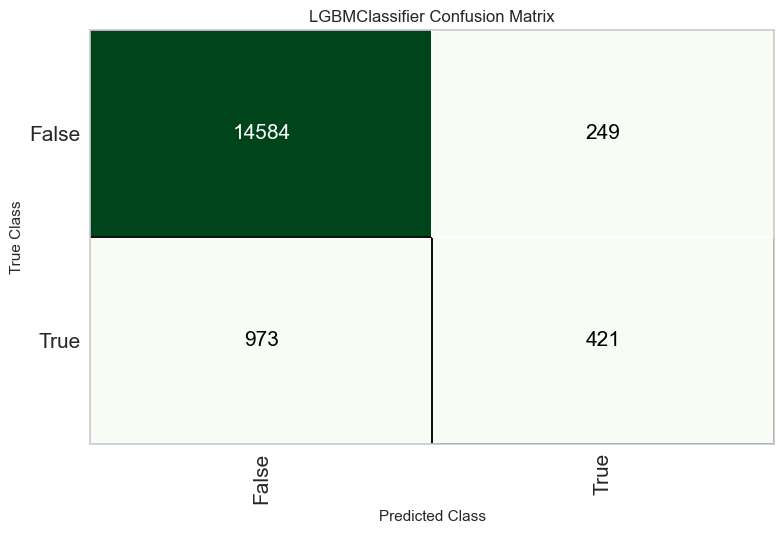

In [31]:
plot_model(lgbm_tuned, plot = 'confusion_matrix')

In [32]:
evaluate_model(lgbm_tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Predict on test

In [33]:
predict_model(lgbm_tuned)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9247,0.8750,0.3020,0.6284,0.4079,0.3730,0.4017


[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


,age,elective_surgery,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,...,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death,prediction_label,prediction_score
25437,81,False,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,0.134028,61.9,106,...,False,False,False,False,False,Respiratory,Respiratory,False,0,0.5204
9568,59,False,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,0.040278,79.4,302,...,False,False,False,False,False,Cardiovascular,Cardiovascular,False,0,0.9980
11610,87,False,Caucasian,F,Accident & Emergency,admit,Med-Surg ICU,0.202083,57.7,301,...,False,False,False,False,False,Neurological,Neurologic,True,0,0.9488
71019,69,True,Caucasian,M,Operating Room / Recovery,admit,CCU-CTICU,0.402083,117.9,203,...,False,False,False,False,False,Cardiovascular,Cardiovascular,False,0,0.9824
31142,66,False,African American,F,Accident & Emergency,admit,Neuro ICU,0.089583,94.6,301,...,False,False,False,False,False,Neurological,Neurologic,True,0,0.6525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62284,41,False,African American,F,Accident & Emergency,admit,Med-Surg ICU,0.055556,95.7,306,...,False,False,False,False,False,Hematological,Haematologic,False,0,0.9976
53235,57,True,Caucasian,M,Operating Room / Recovery,admit,SICU,0.367361,107.1,209,...,False,False,False,False,False,Respiratory,Respiratory,False,0,0.9959
59248,76,False,Caucasian,F,Floor,admit,CCU-CTICU,2.740278,76.06,113,...,False,False,False,False,False,Sepsis,Cardiovascular,True,0,0.6469
36084,85,False,Caucasian,F,Accident & Emergency,transfer,MICU,0.047222,74.7,105,...,False,False,False,False,False,Respiratory,Respiratory,False,0,0.6574


### Finalize Model

In [34]:
final_dt = finalize_model(lgbm_tuned)

In [35]:
print(final_dt)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'pre_icu_los_days',
                                             'weight', 'apache_2_diagnosis',
                                             'apache_3j_diagnosis',
                                             'gcs_eyes_apache',
                                             'gcs_motor_apache',
                                             'gcs_verbal_apache',
                                             'resprate_apache', 'temp_apache',
                                             'd1_diasbp_min',
                                             'd1_heartrate_max', 'd1_mbp_min',
                                             'd1_resprate_min', 'd1_spo2_ma...
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=1.0,
             

In [36]:
predict_model(final_dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9431,0.9420,0.4340,0.8176,0.5670,0.5396,0.5707


[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


,age,elective_surgery,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,...,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death,prediction_label,prediction_score
25437,81,False,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,0.134028,61.9,106,...,False,False,False,False,False,Respiratory,Respiratory,False,0,0.5418
9568,59,False,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,0.040278,79.4,302,...,False,False,False,False,False,Cardiovascular,Cardiovascular,False,0,0.9983
11610,87,False,Caucasian,F,Accident & Emergency,admit,Med-Surg ICU,0.202083,57.7,301,...,False,False,False,False,False,Neurological,Neurologic,True,0,0.7173
71019,69,True,Caucasian,M,Operating Room / Recovery,admit,CCU-CTICU,0.402083,117.9,203,...,False,False,False,False,False,Cardiovascular,Cardiovascular,False,0,0.9934
31142,66,False,African American,F,Accident & Emergency,admit,Neuro ICU,0.089583,94.6,301,...,False,False,False,False,False,Neurological,Neurologic,True,0,0.6021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62284,41,False,African American,F,Accident & Emergency,admit,Med-Surg ICU,0.055556,95.7,306,...,False,False,False,False,False,Hematological,Haematologic,False,0,0.9946
53235,57,True,Caucasian,M,Operating Room / Recovery,admit,SICU,0.367361,107.1,209,...,False,False,False,False,False,Respiratory,Respiratory,False,0,0.9989
59248,76,False,Caucasian,F,Floor,admit,CCU-CTICU,2.740278,76.06,113,...,False,False,False,False,False,Sepsis,Cardiovascular,True,0,0.6955
36084,85,False,Caucasian,F,Accident & Emergency,transfer,MICU,0.047222,74.7,105,...,False,False,False,False,False,Respiratory,Respiratory,False,0,0.7592


In [37]:
unseen_predictions = predict_model(final_dt, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9206,0.8650,0.2571,0.5888,0.3580,0.3225,0.3542


[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


,age,elective_surgery,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,...,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death,prediction_label,prediction_score
40102,59,True,African American,M,Operating Room / Recovery,admit,SICU,0.699306,80.8,303,...,False,False,False,False,False,Respiratory,Respiratory,True,0,0.9862
79830,36,False,Caucasian,F,Floor,transfer,Med-Surg ICU,0.099306,79.4,114,...,False,False,False,False,False,Cardiovascular,Cardiovascular,False,0,0.7137
11075,82,False,African American,F,Accident & Emergency,admit,Cardiac ICU,0.134722,72.75,113,...,False,False,False,False,False,Sepsis,Cardiovascular,False,1,0.7249
32646,77,False,Caucasian,F,Accident & Emergency,admit,Med-Surg ICU,0.075,45.45,301,...,False,False,False,False,False,Neurological,Neurologic,False,0,0.9560
18152,61,False,Hispanic,M,Floor,admit,Med-Surg ICU,9.013194,101.6,124,...,False,False,False,False,False,Gastrointestinal,Gastrointestinal,True,0,0.9671


In [38]:
from pycaret.utils.generic import check_metric
res_acc = check_metric(unseen_predictions['hospital_death'], unseen_predictions['prediction_label'], metric = 'Accuracy')
res_prec = check_metric(unseen_predictions['hospital_death'], unseen_predictions['prediction_label'], metric = 'Precision')
res_rec = check_metric(unseen_predictions['hospital_death'], unseen_predictions['prediction_label'], metric = 'Recall')
res_f1 = check_metric(unseen_predictions['hospital_death'], unseen_predictions['prediction_label'], metric = 'F1')

print(f'El resultado final es: \n Accuracy: {res_acc}\n Precision: {res_prec}\n Recall: {res_rec}\n F1: {res_f1}\n')

El resultado final es: 
 Accuracy: 0.9206
 Precision: 0.5888
 Recall: 0.2571
 F1: 0.358



In [39]:
save_model(final_dt,'./FinalModel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'pre_icu_los_days',
                                              'weight', 'apache_2_diagnosis',
                                              'apache_3j_diagnosis',
                                              'gcs_eyes_apache',
                                              'gcs_motor_apache',
                                              'gcs_verbal_apache',
                                              'resprate_apache', 'temp_apache',
                                              'd1_diasbp_min',
                                              'd1_heartrate_max', 'd1_mbp_min',
                                              'd1_resprate_min', 'd1_spo2_ma...
                                 boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, feature_fraction=1.0